>getting the data

In [1]:
# importing important libraries
import pandas as pd
import sqlite3
import numpy as np
%matplotlib inline
import seaborn as sns



In [21]:
# extracting the dataset
cnt = sqlite3.connect('database.sqlite')
game_query = """
SELECT cy.name, lg.name , lg.id, mt.season, mt.stage, mt.date, mt.match_api_id, mt.home_team_api_id, 
mt.away_team_api_id,mt.home_team_goal
FROM country cy
 JOIN league lg ON cy.id =lg.id
 JOIN match mt ON mt.id = lg.id """
 
team_query = """SELECT tm.team_api_id, tm.team_fifa_api_id, tm.team_long_name,
tm.team_short_name, tm_at.buildUpPlaySpeed, tm_at.buildUpPlaySpeedClass, tm_at.buildUpPlayDribbling, 
tm_at.buildUpPlayDribblingClass, tm_at.buildUpPlayPassing, tm_at.buildUpPlayPassingClass 
FROM team tm 
JOIN team_Attributes tm_at ON tm.id = tm_at.id"""

player_query = """
SELECT py.player_api_id, py.player_name, py.player_fifa_api_id, py.birthday, 
py.height, py.weight, py_at.date, py_at.overall_rating, py_at.potential, py_at.preferred_foot, py_at.attacking_work_rate,
py_at.defensive_work_rate, py_at.crossing, py_at.finishing, py_at.heading_accuracy, py_at.short_passing, py_at.volleys,
py_at.dribbling, py_at.curve ,py_at.free_kick_accuracy, py_at.long_passing, py_at.ball_control, py_at.acceleration, 
py_at.sprint_speed,py_at.reactions, py_at.balance, py_at.shot_power, py_at.stamina, 
py_at.strength, py_at.long_shots, py_at.aggression , py_at.positioning, py_at.penalties,
py_at.marking, py_at.standing_tackle, py_at.sliding_tackle
FROM player py
JOIN player_Attributes py_at ON py.id = py_at.id
"""
game = pd.read_sql_query(game_query, cnt)
team =pd.read_sql_query(team_query, cnt)
play =pd.read_sql_query(player_query, cnt)

In [22]:
#exploring the dataset
play.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        11060 non-null  int64  
 1   player_name          11060 non-null  object 
 2   player_fifa_api_id   11060 non-null  int64  
 3   birthday             11060 non-null  object 
 4   height               11060 non-null  float64
 5   weight               11060 non-null  int64  
 6   date                 11060 non-null  object 
 7   overall_rating       11021 non-null  float64
 8   potential            11021 non-null  float64
 9   preferred_foot       11021 non-null  object 
 10  attacking_work_rate  10897 non-null  object 
 11  defensive_work_rate  11021 non-null  object 
 12  crossing             11021 non-null  float64
 13  finishing            11021 non-null  float64
 14  heading_accuracy     11021 non-null  float64
 15  short_passing        11021 non-null 

In [5]:
play.head()


,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
1,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,2015-11-19 00:00:00,67.0,71.0,right,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
2,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,2015-09-21 00:00:00,62.0,66.0,right,...,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,2015-03-20 00:00:00,61.0,65.0,right,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
4,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,2007-02-22 00:00:00,61.0,65.0,right,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0


In [7]:
play.shape

(11060, 40)

In [8]:
team.info()
#team needs to replace missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team_api_id                21 non-null     int64  
 1   team_fifa_api_id           19 non-null     float64
 2   team_long_name             21 non-null     object 
 3   team_short_name            21 non-null     object 
 4   buildUpPlaySpeed           21 non-null     int64  
 5   buildUpPlaySpeedClass      21 non-null     object 
 6   buildUpPlayDribbling       7 non-null      float64
 7   buildUpPlayDribblingClass  21 non-null     object 
 8   buildUpPlayPassing         21 non-null     int64  
 9   buildUpPlayPassingClass    21 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.8+ KB


In [9]:
team.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass
0,9987,673.0,KRC Genk,GEN,60,Balanced,NaN,Little,50,Mixed
1,9993,675.0,Beerschot AC,BAC,52,Balanced,48.0,Normal,56,Mixed
2,10000,15005.0,SV Zulte-Waregem,ZUL,47,Balanced,41.0,Normal,54,Mixed
3,9994,2007.0,Sporting Lokeren,LOK,70,Fast,NaN,Little,70,Long
4,9984,1750.0,KSV Cercle Brugge,CEB,47,Balanced,NaN,Little,52,Mixed


In [10]:
team.shape

(21, 10)

In [11]:
game.head()

,name,name,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal
0,Belgium,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1
1,England,England Premier League,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1
2,France,France Ligue 1,4769,2008/2009,1,2008-08-09 00:00:00,483129,8583,9830,2
3,Germany,Germany 1. Bundesliga,7809,2008/2009,1,2008-08-15 00:00:00,499317,9823,9790,2
4,Italy,Italy Serie A,10257,2008/2009,1,2008-08-31 00:00:00,537632,8524,8551,1


In [12]:
game.shape

(11, 10)

In [14]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              11 non-null     object
 1   name              11 non-null     object
 2   id                11 non-null     int64 
 3   season            11 non-null     object
 4   stage             11 non-null     int64 
 5   date              11 non-null     object
 6   match_api_id      11 non-null     int64 
 7   home_team_api_id  11 non-null     int64 
 8   away_team_api_id  11 non-null     int64 
 9   home_team_goal    11 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 1008.0+ bytes


.fixing  missing values

In [23]:
mean_tm = team['buildUpPlayDribbling'].mean
team['buildUpPlayDribbling'].fillna(mean_tm, inplace = True)
team.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team_api_id                21 non-null     int64  
 1   team_fifa_api_id           19 non-null     float64
 2   team_long_name             21 non-null     object 
 3   team_short_name            21 non-null     object 
 4   buildUpPlaySpeed           21 non-null     int64  
 5   buildUpPlaySpeedClass      21 non-null     object 
 6   buildUpPlayDribbling       21 non-null     object 
 7   buildUpPlayDribblingClass  21 non-null     object 
 8   buildUpPlayPassing         21 non-null     int64  
 9   buildUpPlayPassingClass    21 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ KB


In [25]:
team.head()

RecursionError: maximum recursion depth exceeded in __instancecheck__

RecursionError: maximum recursion depth exceeded in __instancecheck__

In [27]:
#fixing rating and potential missing values
pl_mean = play['overall_rating'].mean()
play['overall_rating'].fillna(pl_mean, inplace= True)
pt_mean = play['potential'].mean()
play['potential'].fillna(pt_mean, inplace= True)
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        11060 non-null  int64  
 1   player_name          11060 non-null  object 
 2   player_fifa_api_id   11060 non-null  int64  
 3   birthday             11060 non-null  object 
 4   height               11060 non-null  float64
 5   weight               11060 non-null  int64  
 6   date                 11060 non-null  object 
 7   overall_rating       11060 non-null  float64
 8   potential            11060 non-null  float64
 9   preferred_foot       11021 non-null  object 
 10  attacking_work_rate  10897 non-null  object 
 11  defensive_work_rate  11021 non-null  object 
 12  crossing             11021 non-null  float64
 13  finishing            11021 non-null  float64
 14  heading_accuracy     11021 non-null  float64
 15  short_passing        11021 non-null 

In [28]:
mean_cr = play['crossing'].mean
play['crossing'].fillna(mean_cr, inplace = True)
mean_pw = play['shot_power'].mean
play['shot_power'].fillna(mean_pw, inplace = True)
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        11060 non-null  int64  
 1   player_name          11060 non-null  object 
 2   player_fifa_api_id   11060 non-null  int64  
 3   birthday             11060 non-null  object 
 4   height               11060 non-null  float64
 5   weight               11060 non-null  int64  
 6   date                 11060 non-null  object 
 7   overall_rating       11060 non-null  float64
 8   potential            11060 non-null  float64
 9   preferred_foot       11021 non-null  object 
 10  attacking_work_rate  10897 non-null  object 
 11  defensive_work_rate  11021 non-null  object 
 12  crossing             11060 non-null  object 
 13  finishing            11060 non-null  object 
 14  heading_accuracy     11021 non-null  float64
 15  short_passing        11021 non-null 

In [35]:
mean_ps = play['long_passing'].mean
play['long_passing'].fillna(mean_ps, inplace = True)
mean_fn = play['finishing'].mean
play['finishing'].fillna(mean_fn, inplace = True)


In [ ]:
mean_sp = play['sprint_speed'].mean
play['sprint_speed'].fillna(mean_sp, inplace = True)
mean_ac = play['acceleration'].mean
play['acceleration'].fillna(mean_ac, inplace = True)


### Research Question 1 (The relationship between physical attributes and player perfomance)

<AxesSubplot:>

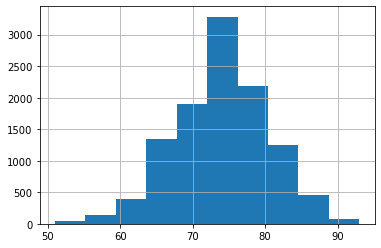

In [31]:
play['potential'].hist()

<AxesSubplot:xlabel='potential', ylabel='overall_rating'>

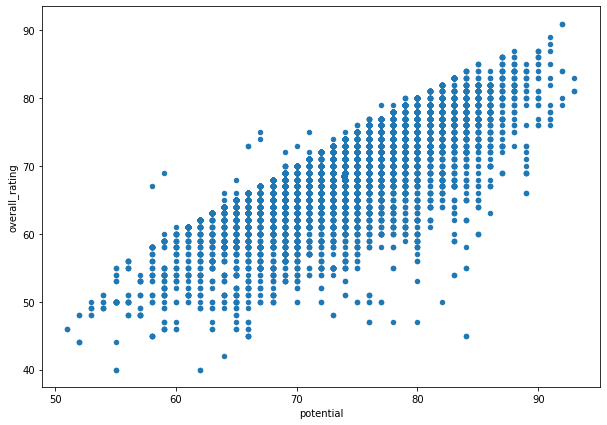

In [33]:
play.plot(x ='potential', y ='overall_rating', kind ='scatter',figsize=(10,7))

<AxesSubplot:xlabel='potential', ylabel='weight'>

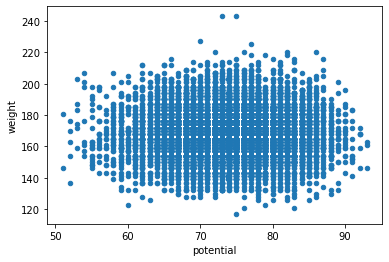

In [39]:
play.plot(x ='potential', y ='weight', kind ='scatter')